<a href="https://colab.research.google.com/github/JingyuHe02/COMP3132/blob/main/Lab_Week05/labweek05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying movie reviews: A binary classification example

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## The IMDB dataset

### Loading the IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Explore the data
1. Print `trian_data`
2. Find the data type and shape.
3. Print out one sample from the `train_data`
4. The sample data is a list. What is the length of the list
5. Repeat the step `3` and `4` for another data point.

In [3]:
# Explore the data
print("Type of train_data:", type(train_data))
print("Number of training samples:", len(train_data))
print("Number of labels:", len(train_labels))

# Print train_data (first 2 samples to keep output readable)
print("\nFirst 2 encoded reviews in train_data:")
print(train_data[:2])

# Data type and (ragged) shape info
lengths = [len(x) for x in train_data]
print("\nEach review is a list of token ids (variable length).")
print("Min length:", min(lengths))
print("Max length:", max(lengths))
print("Average length:", sum(lengths)/len(lengths))

# Print one sample + its length
idx1 = 0
print(f"\nSample {idx1}:", train_data[idx1])
print(f"Length of sample {idx1}:", len(train_data[idx1]))

# Repeat for another data point
idx2 = 1
print(f"\nSample {idx2}:", train_data[idx2])
print(f"Length of sample {idx2}:", len(train_data[idx2]))


Type of train_data: <class 'numpy.ndarray'>
Number of training samples: 25000
Number of labels: 25000

First 2 encoded reviews in train_data:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 6

Each data point in the dataset represents a sequence of words encoded to numbers.

We will see how this encoding process is.

**Find the longest sequence (of words/numbers) in the train_data**

In [4]:
# Find the longest sequence length in train_data
lengths = [len(seq) for seq in train_data]
max_len = max(lengths)
max_idx = lengths.index(max_len)
print("Longest sequence length:", max_len)
print("Index of one longest sequence:", max_idx)


Longest sequence length: 2494
Index of one longest sequence: 17934


**Find the largest number in all sequences**

In [5]:
# Find the largest token id in all sequences in train_data
max_token = max(max(seq) for seq in train_data)
print("Largest token id in train_data:", max_token)


Largest token id in train_data: 9999


### What do the numerical features represent?

In [6]:
word_index = imdb.get_word_index()
print("Total words in word_index:", len(word_index))
# Show a small sample to keep output readable
sample_items = list(word_index.items())[:20]
print("Sample (word -> id) pairs:", sample_items)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Total words in word_index: 88584
Sample (word -> id) pairs: [('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013)]


**Sort the word_index dictionary based on the `value`**

In [7]:
# Sort the word_index dictionary based on the value (ascending)
sorted_word_index = dict(sorted(word_index.items(), key=lambda kv: kv[1]))
# Show first 20 items
first_20 = list(sorted_word_index.items())[:20]
print("First 20 (word, id) pairs after sorting by id:")
print(first_20)


First 20 (word, id) pairs after sorting by id:
[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20)]


**How many words are there in the dictionary**

In [8]:
# Number of words in the word_index dictionary
print("Number of words in word_index:", len(word_index))


Number of words in word_index: 88584


**The word_index is a dictionary mapping words to an integer id: (word, id). reverse this mapping to (id, word) to make the decoding process easier**

In [9]:
word2id = word_index
id2word = {v: k for k, v in word2id.items()}
id2word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

### Decoding reviews back to text

**Use your programing and data structure knowledge to decode the first train data based on `id2word` dictionary**

**Note:** When the IMDB dataset is preprocessed, each actual word's index is offset by 3. That means if a word originally had an index `i` in the word_index, it will appear as `i + 3` in `train_data`. Indices `0`, `1`, and `2` are reserved for special tokens like padding and unknown words. If you find `0`, `1`, or `2` in your review list just return `?`.

In [10]:
# Given
encoded_list = train_data[0]
print("Encoded review (first 50 tokens):", encoded_list[:50])
print("Total tokens in review:", len(encoded_list))
print("\nSample id2word entries (first 20):")
sample_id2word = list(id2word.items())[:20]
print(sample_id2word)


Encoded review (first 50 tokens): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447]
Total tokens in review: 218

Sample id2word entries (first 20):
[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling'), (52009, "hold's"), (11307, 'comically'), (40830, 'localized'), (30568, 'disobeying'), (52010, "'royale"), (40831, "harpo's"), (52011, 'canet'), (19313, 'aileen'), (52012, 'acurately'), (52013, "diplomat's")]


In [11]:
# Decode the first review (train_data[0]) back to text
encoded_list = train_data[0]
decoded_words = []
for token in encoded_list:
    if token in (0, 1, 2):
        decoded_words.append("?")
    else:
        # actual word index is offset by 3
        decoded_words.append(id2word.get(token - 3, "?"))
review_1 = " ".join(decoded_words)
print(review_1[:1000])  # print first 1000 chars to keep output readable


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Your output looks like this:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all

**The first data is a positive review. Decode the second train data with the same logic.**

In [12]:
# Decode the second review (train_data[1]) back to text using the same logic
encoded_list = train_data[1]
decoded_words = []
for token in encoded_list:
    if token in (0, 1, 2):
        decoded_words.append("?")
    else:
        decoded_words.append(id2word.get(token - 3, "?"))
review_2 = " ".join(decoded_words)
print(review_2[:1000])  # print first 1000 chars


? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


> **Encoding: sequence of words -> sequence of integer numbers (`tokens`)**

> **Decoding: sequence of tokens -> decoded to sequence words**

### Preparing the data



**Encoding the integer sequences via multi-hot encoding**

We have to process our data one step further to get embeddings from decoded data. Then we can feed this data to the neural network.

> **Encoding Step: sequence of words -> sequence of integer numbers (`tokens`)**

> **Embedding Step: sequence of tokens from the previous step -> bag of words**

In [13]:
# Note: In the previous part we saw that the largest number in all sequences is `9999`.

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results
x_train_emb = vectorize_sequences(train_data)
x_test_emb = vectorize_sequences(test_data)

**Do sanity Check on the length of `train_data`, `test_data` and the shape of `x_train_emb`, `x_test_emb`**

In [14]:
# Sanity check on lengths and shapes
print("len(train_data):", len(train_data))
print("len(test_data):", len(test_data))
print("x_train_emb shape:", x_train_emb.shape)
print("x_test_emb shape:", x_test_emb.shape)


len(train_data): 25000
len(test_data): 25000
x_train_emb shape: (25000, 10000)
x_test_emb shape: (25000, 10000)


**Probing the first data_point list of `ids` and its corresponding `embeding`**

In [15]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [16]:
print(sorted(train_data[0]))

[1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 21, 22, 22, 22, 22, 22, 22, 25, 25, 25, 25, 26, 26, 26, 28, 28, 30, 32, 32, 32, 33, 33, 35, 36, 36, 36, 36, 38, 38, 38, 38, 39, 43, 43, 43, 43, 46, 48, 50, 50, 51, 51, 52, 56, 62, 65, 65, 66, 66, 71, 71, 76, 77, 82, 87, 88, 88, 92, 98, 100, 103, 104, 104, 106, 107, 112, 112, 113, 117, 124, 130, 134, 135, 141, 144, 147, 150, 167, 172, 172, 173, 178, 192, 194, 215, 224, 226, 226, 256, 256, 283, 284, 297, 316, 317, 336, 381, 385, 386, 400, 407, 447, 458, 469, 476, 476, 480, 480, 480, 515, 530, 530, 530, 546, 619, 626, 670, 723, 838, 973, 1029, 1111, 1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785, 3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486]


In [17]:
x_train_emb[0][0:100] # 10,000 places, the first 100 places are shown here

array([ 0.,  1.,  6.,  0., 15.,  9.,  3.,  2.,  3.,  1.,  0.,  0.,  6.,
        3.,  3.,  4., 11.,  3.,  3.,  2.,  0.,  1.,  6.,  0.,  0.,  4.,
        3.,  0.,  2.,  0.,  1.,  0.,  3.,  2.,  0.,  1.,  4.,  0.,  4.,
        1.,  0.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  2.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

In [18]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Print your labels**

In [19]:
# Print your labels (first 20)
print("First 20 train labels:", y_train[:20])
print("Label counts:", {0: int((y_train==0).sum()), 1: int((y_train==1).sum())})


First 20 train labels: [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
Label counts: {0: 12500, 1: 12500}


y_train

## ML Design

**Task:**
Our neural network model should get the embedded vector of a review and assign label 0 if the review is negative or 1 if the review is positive.

**Note:** This task is called **`sentiment analysis`** task

### Building your model

**Model definition**

- `2` hidden layers with `16` units
- output layer with `1` unit.
- select the suitable activation function for each layer.

In [20]:
# Model definition: 2 hidden layers (16 units each) + 1-unit output
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the model**

In [21]:
# Compile the model for binary classification
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


**Find the accuracy of the model before training using the `Model.evaluate()` method. Is it better to use this untrained model or simply guess the label by chance?**

In [22]:
# Evaluate the model before training
loss, acc = model.evaluate(x_train_emb, y_train, verbose=0)
print(f"Untrained model - loss: {loss:.4f}, accuracy: {acc:.4f}")
print("Chance baseline (random guess) is about 0.50 accuracy for balanced classes.")


Untrained model - loss: 0.7048, accuracy: 0.5037
Chance baseline (random guess) is about 0.50 accuracy for balanced classes.


### Training and validating your model

**Setting aside a validation set**

In [23]:
x_val = x_train_emb[:10000]
partial_x_train = x_train_emb[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We use a validation set to evaluate the model during training.So, it can be seen as a small test set used to monitor the model's performance during training.

**Training your model**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.6559 - loss: 0.6328 - val_accuracy: 0.8479 - val_loss: 0.4606
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8662 - loss: 0.4226 - val_accuracy: 0.8657 - val_loss: 0.3761
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8916 - loss: 0.3275 - val_accuracy: 0.8896 - val_loss: 0.3182
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9172 - loss: 0.2615 - val_accuracy: 0.8934 - val_loss: 0.2936
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9313 - loss: 0.2168 - val_accuracy: 0.8927 - val_loss: 0.2829
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9425 - loss: 0.1851 - val_accuracy: 0.8820 - val_loss: 0.3136
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9410 - loss: 0.1752 - val_accuracy: 0.8851 - val_loss: 0.2973
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9540 - loss: 0.1453 - val_accuracy: 0.8924 - 

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

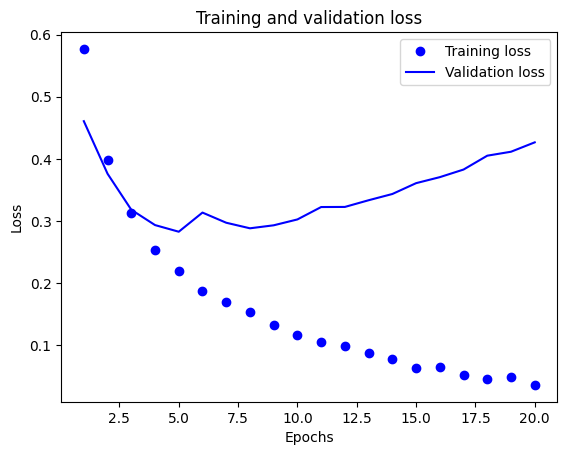

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

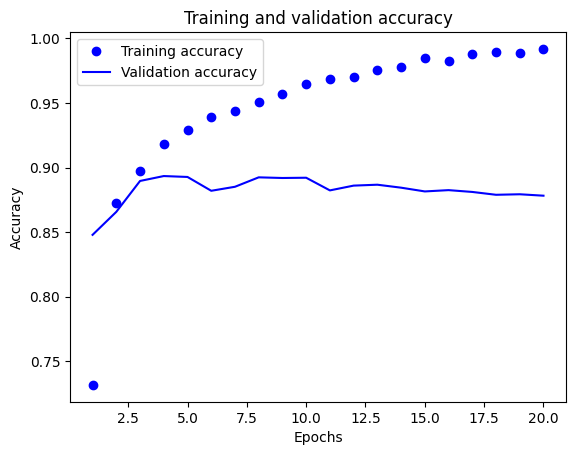

In [27]:
# Plot training and validation accuracy
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


- **Retraining a model from scratch on all training data**
    - define a new model with the same architecture
    - pass `(x_train_emb,y_train)` (without a validation set)
- **stopping the training at the epoch where overfitting begins (epoch=4).**

In [28]:
# Retrain a new model from scratch on ALL training data (stop at epoch=4)
model2 = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

history2 = model2.fit(x_train_emb, y_train,
                      epochs=4,
                      batch_size=512,
                      verbose=1)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6824 - loss: 0.6022
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8847 - loss: 0.3502
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9077 - loss: 0.2695
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9240 - loss: 0.2219


### Evaluating the model

In [29]:
# Evaluate the retrained model on the test set
test_loss, test_acc = model2.evaluate(x_test_emb, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Test loss: 0.2844
Test accuracy: 0.8907


## `Sentimane analysis` task with LLMs (optional)

If I have a decoded review (such as `review_1` and `review_2` from previous cells), I can pass the following prompt to an LLM (such as LLama) through an API call or using ChatGPT website to get the sentiment of the review.

In [30]:
promp = f"""
__ASK__
pridcit the label for review of the imdb dataset.
the reviews are delimitted by <>.

__CONSTRANTS__
-answer in one word: "positive" or "negative"

__CONTEXT__
<{review_1}>
<{review_2}>
"""

Also, I can pass the following message to ChatGPT to get the sentiment of the review for the first and second data points in this dataset.

__ASK__

pridcit the label for review of the imdb dataset.
the reviews are delimitted by <>.

__CONSTRANTS__
- answer in one word: "positive" or "negative"

__CONTEXT__

- **Review_1:** <this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi>

- **Review_2:** <big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then>
